# Breast Cancer Survival Period Prediction: Classification 

Starting with importing the datset from a.csv file and replacing entries with codes representing missing values. We aslo drop any rows with missing values in either Diagnosis year (YEAR_DX) or Survival Time in Months (SRV_TIME_MON) as these values directly affect the target variable and hence, removed from model training.

In [1]:
import pandas as pd

breast_cancer=pd.read_csv('final_breast_cancer.csv',index_col=0)

breast_cancer.replace(to_replace={'MAR_STAT':9,'RACE1V':99,'AGE_DX':999,'SEQ_NUM':99,
                                  'Lateral':9,'GRADE':9,'DX_CONF':9,'CSEXTEN':999,
                                  'CSLYMPHN':999,'DAJCCT':88,'DAJCCN':88,'DAJCCM':88,
                                  'SURGSCOF':9,'SURGSITF':9,'NO_SURG':9,'AGE_1REC':99,
                                  'RAC_RECA':9,'RAC_RECY':9,'HST_STGA':9,'INTPRIM':9,
                                  'ERSTATUS':9,'PRSTATUS':9,'SRV_TIME_MON':9999,'SRV_TIME_MON_FLAG':9,
                                  'HER2':9,'BRST_SUB':9,'MALIGCOUNT':99,'BENBORDCOUNT':99,
                                  'RAD_SURG':9},value=pd.np.nan,inplace=True)

breast_cancer.replace({'EOD10_PN':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'EOD10_NE':{95:pd.np.nan,96:pd.np.nan,97:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'CSTUMSIZ':{990:0,991:10,992:20,993:30,994:40,995:50,996:pd.np.nan,997:pd.np.nan,998:pd.np.nan,
                                   999:pd.np.nan,888:pd.np.nan},
                       'DAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan},
                       'DSS1977S':{8:pd.np.nan,9:pd.np.nan},'SURGPRIF':{90:pd.np.nan,98:pd.np.nan,99:pd.np.nan},
                       'ADJTM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJNM_6VALUE':{88:pd.np.nan,99:pd.np.nan},
                       'ADJM_6VALUE':{88:pd.np.nan,99:pd.np.nan},'ADJAJCCSTG':{88:pd.np.nan,90:pd.np.nan,99:pd.np.nan}
                       },inplace=True)

breast_cancer.dropna(axis=0,how='any',subset=['YEAR_DX','SRV_TIME_MON'],inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(breast_cancer.head(3))

C:\Users\dshre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (134,135,136,137,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if sys.path[0] == '':
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app
C:\Users\dshre\Anaconda3\lib\site-packages\ipykernel_launcher.

              REG  MAR_STAT  RACE1V  NHIADE  SEX  AGE_DX  YR_BRTH  SEQ_NUM  \
PUBCSNUM                                                                     
5100108.0  1502.0       5.0     1.0     NaN  2.0    65.0   1946.0      2.0   
5100156.0  1502.0       2.0     1.0     NaN  2.0    78.0   1926.0      2.0   
5100170.0  1502.0       1.0     1.0     NaN  2.0    67.0   1940.0      3.0   

           MDXRECMP  YEAR_DX PRIMSITE  LATERAL  HISTO2V  BEHO2V  HISTO3V  \
PUBCSNUM                                                                   
5100108.0      10.0   2011.0     C504      2.0   8230.0     2.0   8230.0   
5100156.0       6.0   2005.0     C501      1.0   8500.0     2.0   8500.0   
5100170.0       4.0   2008.0     C504      2.0   8500.0     2.0   8523.0   

           BEHO3V  GRADE  DX_CONF  REPT_SRC  EOD10_SZ  EOD10_EX  EOD10_PE  \
PUBCSNUM                                                                    
5100108.0     2.0    2.0      1.0       1.0       NaN       NaN       NaN 

We are looking for % Missing in each column of the dataset. Those columns with more than 20% missing, are measured across different timeframes or not related measurements to this type of cancer. Hence, they are removed.

In [2]:
columns=breast_cancer.isna().sum(axis=0)/len(breast_cancer)
columns_list=list(columns[columns<0.2].index)

breast_cancer=breast_cancer.filter(items=columns_list,axis=1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print('% Missing in each column')
    print(columns)

% Missing in each column
REG                  0.000000
MAR_STAT             0.054712
RACE1V               0.005031
NHIADE               1.000000
SEX                  0.000000
AGE_DX               0.000039
YR_BRTH              0.000039
SEQ_NUM              0.000008
MDXRECMP             0.000000
YEAR_DX              0.000000
PRIMSITE             0.000000
LATERAL              0.000000
HISTO2V              0.000000
BEHO2V               0.000000
HISTO3V              0.000000
BEHO3V               0.000000
GRADE                0.104800
DX_CONF              0.002178
REPT_SRC             0.000000
EOD10_SZ             1.000000
EOD10_EX             1.000000
EOD10_PE             1.000000
EOD10_ND             1.000000
EOD10_PN             0.268726
EOD10_NE             0.029288
EOD13                1.000000
EOD2                 1.000000
EOD4                 1.000000
EOD_CODE             1.000000
TUMOR_1V             1.000000
TUMOR_2V             1.000000
TUMOR_3V             1.000000
CSTUMSIZ       

Now, we are treating all the other columns for their missing values. For the categorical variables, the missing values are filled with the mode while the median is used for Quantitative Variables. The columns which directly affect the target variable or are irrelevant to this type of cancer from domain knowledge are removed.

In addition, classes of survival months are created for prediction.

In [3]:
stats=breast_cancer.describe().loc['50%']
catg=breast_cancer.mode()

drop_cols=['MDXRECMP','YEAR_DX','CSVFIRST','CSVLATES','CSVCURRENT','ICCC3WHO',
           'ICCC3XWHO','CODPUB','CODPUBKM','STAT_REC','IHSLINK','VSRTSADX','ODTHCLASS',
           'CSTSEVAL','CSRGEVAL','CSMTEVAL','ST_CNTY','SRV_TIME_MON','SRV_TIME_MON_FLAG',
           '1year_survival','5year_survival']
catg_cols=['REG','MAR_STAT','RACE1V','SEX','PRIMSITE','LATERAL','BEHO2V', 'BEHO3V','GRADE',
           'DX_CONF','REPT_SRC','CSMETSDX','DAJCCT','DAJCCN','DAJCCM','DAJCCSTG','DSS1977S',
           'SCSSM2KO','SURGPRIF','SURGSITF','NO_SURG','TYPE_FU','AGE_1REC','SITERWHO',
           'ICDOTO9V','ICDOT10V','BEHTREND','HISTREC','HISTRECB','CS0204SCHEMA','RAC_RECA',
           'RAC_RECY','ORIGRECB','HST_STGA','FIRSTPRM','SUMM2K','AYASITERWHO','LYMSUBRWHO',
           'INTPRIM','ERSTATUS','PRSTATUS','CSSCHEMA','ADJTM_6VALUE','ADJNM_6VALUE',
           'ADJM_6VALUE','ADJAJCCSTG','ANNARBOR','RADIATNR','RAD_SURG','CHEMO_RX_REC']
num_cols=['AGE_DX','YR_BRTH','SEQ_NUM','EOD10_NE','CSTUMSIZ','CSEXTEN','CSLYMPHN',
          'HISTO2V','HISTO3V','CS1SITE','CS2SITE','CS3SITE','CS4SITE','CS5SITE',
          'CS6SITE','CS25SITE','REC_NO','MALIGCOUNT','BENBORDCOUNT']

values=dict()
for i in catg_cols:
    values[i]=catg[i][0]
for i in num_cols:
    values[i]=stats[i]

breast_cancer.fillna(value=values,inplace=True)

breast_cancer['survival_classes']=breast_cancer.apply(lambda row: 
    '<=5yrs' if (row.SRV_TIME_MON<=60) 
    else ('5-10yrs'  if (row.SRV_TIME_MON<=120) else '>10yrs'),axis=1)

print(values)

{'REG': 1541.0, 'MAR_STAT': 2.0, 'RACE1V': 1.0, 'SEX': 2.0, 'PRIMSITE': 'C504', 'LATERAL': 2.0, 'BEHO2V': 3.0, 'BEHO3V': 3.0, 'GRADE': 2.0, 'DX_CONF': 1.0, 'REPT_SRC': 1.0, 'CSMETSDX': 0.0, 'DAJCCT': 18.0, 'DAJCCN': 0.0, 'DAJCCM': 0.0, 'DAJCCSTG': 10.0, 'DSS1977S': 1.0, 'SCSSM2KO': 1.0, 'SURGPRIF': 22.0, 'SURGSITF': 0.0, 'NO_SURG': 0.0, 'TYPE_FU': 2.0, 'AGE_1REC': 13.0, 'SITERWHO': 26000.0, 'ICDOTO9V': 1744.0, 'ICDOT10V': 'C504', 'BEHTREND': 3.0, 'HISTREC': 9.0, 'HISTRECB': 98.0, 'CS0204SCHEMA': 13.0, 'RAC_RECA': 1.0, 'RAC_RECY': 1.0, 'ORIGRECB': 0.0, 'HST_STGA': 1.0, 'FIRSTPRM': 1.0, 'SUMM2K': 1.0, 'AYASITERWHO': 36.0, 'LYMSUBRWHO': 99.0, 'INTPRIM': 1.0, 'ERSTATUS': 1.0, 'PRSTATUS': 1.0, 'CSSCHEMA': 58.0, 'ADJTM_6VALUE': 18.0, 'ADJNM_6VALUE': 0.0, 'ADJM_6VALUE': 0.0, 'ADJAJCCSTG': 10.0, 'ANNARBOR': 8.0, 'RADIATNR': 0.0, 'RAD_SURG': 0.0, 'CHEMO_RX_REC': 0.0, 'AGE_DX': 61.0, 'YR_BRTH': 1949.0, 'SEQ_NUM': 0.0, 'EOD10_NE': 2.0, 'CSTUMSIZ': 16.0, 'CSEXTEN': 100.0, 'CSLYMPHN': 0.0, 'HISTO2V

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(breast_cancer.head(3))

              REG  MAR_STAT  RACE1V  SEX  AGE_DX  YR_BRTH  SEQ_NUM  MDXRECMP  \
PUBCSNUM                                                                       
5100108.0  1502.0       5.0     1.0  2.0    65.0   1946.0      2.0      10.0   
5100156.0  1502.0       2.0     1.0  2.0    78.0   1926.0      2.0       6.0   
5100170.0  1502.0       1.0     1.0  2.0    67.0   1940.0      3.0       4.0   

           YEAR_DX PRIMSITE  LATERAL  HISTO2V  BEHO2V  HISTO3V  BEHO3V  GRADE  \
PUBCSNUM                                                                        
5100108.0   2011.0     C504      2.0   8230.0     2.0   8230.0     2.0    2.0   
5100156.0   2005.0     C501      1.0   8500.0     2.0   8500.0     2.0    1.0   
5100170.0   2008.0     C504      2.0   8500.0     2.0   8523.0     2.0    1.0   

           DX_CONF  REPT_SRC  EOD10_NE  CSTUMSIZ  CSEXTEN  CSLYMPHN  CSMETSDX  \
PUBCSNUM                                                                        
5100108.0      1.0       1.0   

Importing all the required packages

In [31]:
import tensorflow
from numpy.random import seed
#from tensorflow import set_random_seed
import numpy as np

from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn.utils import resample

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Flatten, Conv1D
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

First, upsampling the dataset for the low_survival and mid_survival classes to the size of high survival class.

Then, seperating the upsampled dataset into Predictors(data) set and Target Variable and getting dummy variables for all the categorical variables identified before. This inflates our dataset significantly as seen with the shape below.

In [6]:
data=breast_cancer[breast_cancer['YEAR_DX'].between(2004,2006)].drop(columns=drop_cols)
low_survival=data[data['survival_classes']=='<=5yrs']
mid_survival=data[data['survival_classes']=='5-10yrs']
high_survival=data[data['survival_classes']=='>10yrs']

low_survival=resample(low_survival,replace=True,n_samples=len(high_survival),random_state=21)
mid_survival=resample(mid_survival,replace=True,n_samples=len(high_survival),random_state=21)

data_upsampled=pd.concat([low_survival,mid_survival,high_survival],axis=0)
    
data=data_upsampled.drop(columns=['survival_classes'])
target=data_upsampled['survival_classes']
data=pd.get_dummies(data,prefix=catg_cols,columns=catg_cols,drop_first=False)

print(data.shape)
data.head()

(373626, 414)


,AGE_DX,YR_BRTH,SEQ_NUM,HISTO2V,HISTO3V,EOD10_NE,CSTUMSIZ,CSEXTEN,CSLYMPHN,CS1SITE,...,RADIATNR_7.0,RADIATNR_8.0,RAD_SURG_0.0,RAD_SURG_2.0,RAD_SURG_3.0,RAD_SURG_4.0,RAD_SURG_5.0,RAD_SURG_6.0,CHEMO_RX_REC_0.0,CHEMO_RX_REC_1.0
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
38324058.0,77.0,1928.0,0.0,8500.0,8500.0,2.0,18.0,100.0,0.0,10.0,...,0,0,0,0,1,0,0,0,1,0
19586522.0,55.0,1949.0,0.0,8000.0,8000.0,0.0,16.0,100.0,0.0,998.0,...,0,0,1,0,0,0,0,0,0,1
19632960.0,64.0,1942.0,0.0,8010.0,8575.0,13.0,45.0,100.0,600.0,10.0,...,0,0,0,0,1,0,0,0,0,1
28546964.0,88.0,1915.0,0.0,8500.0,8500.0,7.0,22.0,100.0,250.0,20.0,...,0,0,1,0,0,0,0,0,1,0
38793477.0,45.0,1960.0,0.0,8500.0,8500.0,0.0,16.0,100.0,0.0,10.0,...,0,0,1,0,0,0,0,0,1,0


The whole dataset is also split into training and test sets in the ratio of 80:20.

Normalizing the training set using StandardScaler (z-score normalization). Normalization is required to help with faster and more accurate training of Neural Networks.
Test set is also normalized using he same scaler used to normalize the training set.

In [7]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=101)

scaler=StandardScaler()
train_data=pd.DataFrame(scaler.fit_transform(train_data),index=train_data.index,columns=train_data.columns)
test_data=pd.DataFrame(scaler.transform(test_data),index=test_data.index,columns=test_data.columns)

print(train_data.shape)
print(test_data.shape)

(298900, 414)
(74726, 414)


Encoding the different classes in the target set and then performing one hot encoding on them to get dummies of the target set. This is done for both training set and test set.

In [9]:
encoder = LabelEncoder()
encoder.fit(train_target)
encoded_train_target = encoder.transform(train_target)
dummy_train_target = np_utils.to_categorical(encoded_train_target)

encoded_test_target=encoder.transform(test_target)
dummy_test_target = np_utils.to_categorical(encoded_test_target)

print(dummy_train_target[:5])
print()
print(dummy_test_target[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## ANN Model

Defining the structure of the ANN with 4 hidden layers with [300,212,106,25] neurons each and ReLU activation function on the hidden layers and softmax activation on the output layer. The output layer has three neuron in line with the number of classes for prediction. 10% dropout layer is used after first and second hidden layers.

Loss Function- Categorical Crossentropy

Optimizer- ADAM

Observed Metrics- Accuracy

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model. 

In [15]:
model=Sequential()
    
model.add(Dense(300, input_dim=train_data.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(212, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(106, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(train_data, dummy_train_target, epochs=150, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/150
298900/298900 [==============================] - 26s 85us/step - loss: 0.8998 - acc: 0.5633 - val_loss: 0.8895 - val_acc: 0.5697
Epoch 2/150
298900/298900 [==============================] - 27s 89us/step - loss: 0.8741 - acc: 0.5804 - val_loss: 0.8692 - val_acc: 0.5819
Epoch 3/150
298900/298900 [==============================] - 37s 123us/step - loss: 0.8534 - acc: 0.5931 - val_loss: 0.8505 - val_acc: 0.5956
Epoch 4/150
298900/298900 [==============================] - 32s 107us/step - loss: 0.8294 - acc: 0.6075 - val_loss: 0.8274 - val_acc: 0.6092
Epoch 5/150
298900/298900 [==============================] - 26s 86us/step - loss: 0.8036 - acc: 0.6237 - val_loss: 0.8067 - val_acc: 0.6232
Epoch 6/150
298900/298900 [==============================] - 29s 96us/step - loss: 0.7785 - acc: 0.6378 - val_loss: 0.7841 - val_acc: 0.6404
Epoch 7/150
298900/298900 [==============================] - 28s 94us/step - loss: 0.7566 - acc: 0.65

298900/298900 [==============================] - 23s 77us/step - loss: 0.4480 - acc: 0.8148 - val_loss: 0.4917 - val_acc: 0.8111
Epoch 115/150
298900/298900 [==============================] - 23s 76us/step - loss: 0.4464 - acc: 0.8167 - val_loss: 0.4925 - val_acc: 0.8127
Epoch 116/150
298900/298900 [==============================] - 23s 77us/step - loss: 0.4454 - acc: 0.8169 - val_loss: 0.4882 - val_acc: 0.8135
Epoch 117/150
298900/298900 [==============================] - 23s 77us/step - loss: 0.4462 - acc: 0.8157 - val_loss: 0.4874 - val_acc: 0.8131
Epoch 118/150
298900/298900 [==============================] - 23s 77us/step - loss: 0.4469 - acc: 0.8157 - val_loss: 0.4934 - val_acc: 0.8134
Epoch 119/150
298900/298900 [==============================] - 23s 77us/step - loss: 0.4431 - acc: 0.8181 - val_loss: 0.4841 - val_acc: 0.8162
Epoch 120/150
298900/298900 [==============================] - 23s 77us/step - loss: 0.4433 - acc: 0.8176 - val_loss: 0.4870 - val_acc: 0.8138
Epoch 121/150

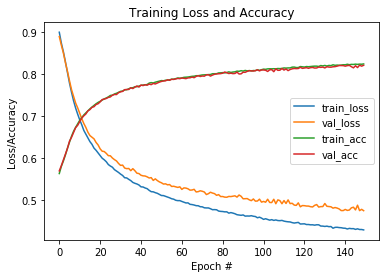

In [16]:
epoch_num = np.arange(0, 150)
plt.figure()
plt.plot(epoch_num, hist.history["loss"], label="train_loss")
plt.plot(epoch_num, hist.history["val_loss"], label="val_loss")
plt.plot(epoch_num, hist.history["acc"], label="train_acc")
plt.plot(epoch_num, hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('Breast Cancer ANN Epoch Plot.png')

It can be seen from the graph above that validation loss stabilizes around the 100 epoch mark with training loss still decreasing. Hence, to prevent overfitting, we fit the model agin over 100 epochs.

In [17]:
model=Sequential()
    
model.add(Dense(300, input_dim=train_data.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(212, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(106, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_data, dummy_train_target, epochs=100, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/100
298900/298900 [==============================] - 25s 83us/step - loss: 0.8984 - acc: 0.5627 - val_loss: 0.8862 - val_acc: 0.5713
Epoch 2/100
298900/298900 [==============================] - 23s 77us/step - loss: 0.8736 - acc: 0.5801 - val_loss: 0.8710 - val_acc: 0.5816
Epoch 3/100
298900/298900 [==============================] - 23s 77us/step - loss: 0.8526 - acc: 0.5929 - val_loss: 0.8526 - val_acc: 0.5926
Epoch 4/100
298900/298900 [==============================] - 23s 78us/step - loss: 0.8277 - acc: 0.6085 - val_loss: 0.8294 - val_acc: 0.6072
Epoch 5/100
298900/298900 [==============================] - 23s 78us/step - loss: 0.8014 - acc: 0.6248 - val_loss: 0.8077 - val_acc: 0.6231
Epoch 6/100
298900/298900 [==============================] - 23s 77us/step - loss: 0.7758 - acc: 0.6409 - val_loss: 0.7837 - val_acc: 0.6374
Epoch 7/100
298900/298900 [==============================] - 23s 78us/step - loss: 0.7534 - acc: 0.6535

Finding the Training set and Test set accuracy using keras.evaluate()

In [18]:
_, accuracy = model.evaluate(train_data, dummy_train_target)
_, test_accuracy = model.evaluate(test_data, dummy_test_target)

print('Train Accuracy=',accuracy)
print('Test Accuracy=',test_accuracy)

74726/74726 [==============================] - 4s 47us/step
Train Accuracy= 0.904998327198137
Test Accuracy= 0.8091293525696439


Performance comparison between the Training Set and Test Set.

In [19]:
y_hat_train_class = model.predict_classes(train_data, verbose=1)
y_hat_test_class = model.predict_classes(test_data, verbose=1)

print('Training Set Performance')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(conf_matrix_ann)
cr_ann = classification_report(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(cr_ann)

print('\n')

print('Test Set Performance')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(conf_matrix_ann)

cr_ann = classification_report(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(cr_ann)

74726/74726 [==============================] - 3s 44us/step
Training Set Performance
[[93397  1838  4284]
 [ 1113 96527  2116]
 [12371  6674 80580]]
              precision    recall  f1-score   support

     5-10yrs       0.87      0.94      0.91     99519
      <=5yrs       0.92      0.97      0.94     99756
      >10yrs       0.93      0.81      0.86     99625

    accuracy                           0.90    298900
   macro avg       0.91      0.90      0.90    298900
weighted avg       0.91      0.90      0.90    298900



Test Set Performance
[[21595  1095  2333]
 [  898 22607  1281]
 [ 5709  2947 16261]]
              precision    recall  f1-score   support

     5-10yrs       0.77      0.86      0.81     25023
      <=5yrs       0.85      0.91      0.88     24786
      >10yrs       0.82      0.65      0.73     24917

    accuracy                           0.81     74726
   macro avg       0.81      0.81      0.81     74726
weighted avg       0.81      0.81      0.81     74726



## RNN Model 

For both the RNN and CNN models, we need the input to be 3-dimensional including the timesteps. Therefore, reshaping the 2-D array into 3-D space.

In [20]:
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

train_data=train_data.reshape(train_data.shape[0],1,train_data.shape[1])
test_data=test_data.reshape(test_data.shape[0],1,test_data.shape[1])

print(train_data.shape)
print(test_data.shape)

(298900, 1, 414)
(74726, 1, 414)


Defining the structure of the RNN with 3 hidden layers with [128,64,32] neurons each and ReLU activation function on the hidden layers and softmax activation on the output layer. The output layer has three neuron in line with the number of classes for prediction. 10% dropout layer is used after the first and last hidden layer.

Loss Function- Categorical Crossentropy

Optimizer- ADAM

Observed Metrics- Accuracy

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model.

In [24]:
model=Sequential()
    
model.add(LSTM(128, input_shape=train_data.shape[1:], return_sequences=True,activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True,activation='relu'))
model.add(LSTM(32, return_sequences=False,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(train_data, dummy_train_target, epochs=150, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/150
298900/298900 [==============================] - 51s 169us/step - loss: 0.8995 - acc: 0.5641 - val_loss: 0.8782 - val_acc: 0.5763
Epoch 2/150
298900/298900 [==============================] - 49s 164us/step - loss: 0.8638 - acc: 0.5868 - val_loss: 0.8554 - val_acc: 0.5910
Epoch 3/150
298900/298900 [==============================] - 47s 158us/step - loss: 0.8271 - acc: 0.6090 - val_loss: 0.8248 - val_acc: 0.6104
Epoch 4/150
298900/298900 [==============================] - 48s 159us/step - loss: 0.7893 - acc: 0.6318 - val_loss: 0.7973 - val_acc: 0.6279
Epoch 5/150
298900/298900 [==============================] - 48s 161us/step - loss: 0.7535 - acc: 0.6513 - val_loss: 0.7714 - val_acc: 0.6444
Epoch 6/150
298900/298900 [==============================] - 48s 161us/step - loss: 0.7231 - acc: 0.6678 - val_loss: 0.7507 - val_acc: 0.6563
Epoch 7/150
298900/298900 [==============================] - 48s 161us/step - loss: 0.6970 - acc:

Epoch 58/150
298900/298900 [==============================] - 50s 167us/step - loss: 0.4208 - acc: 0.8275 - val_loss: 0.5467 - val_acc: 0.7960
Epoch 59/150
298900/298900 [==============================] - 55s 185us/step - loss: 0.4197 - acc: 0.8276 - val_loss: 0.5544 - val_acc: 0.7952
Epoch 60/150
298900/298900 [==============================] - 46s 155us/step - loss: 0.4192 - acc: 0.8286 - val_loss: 0.5481 - val_acc: 0.7976
Epoch 61/150
298900/298900 [==============================] - 48s 161us/step - loss: 0.4164 - acc: 0.8291 - val_loss: 0.5464 - val_acc: 0.7977
Epoch 62/150
298900/298900 [==============================] - 46s 153us/step - loss: 0.4169 - acc: 0.8297 - val_loss: 0.5488 - val_acc: 0.7996
Epoch 63/150
298900/298900 [==============================] - 47s 157us/step - loss: 0.4137 - acc: 0.8315 - val_loss: 0.5363 - val_acc: 0.8003
Epoch 64/150
298900/298900 [==============================] - 45s 150us/step - loss: 0.4119 - acc: 0.8321 - val_loss: 0.5438 - val_acc: 0.8004

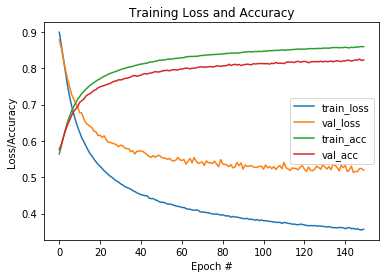

In [26]:
epoch_num = np.arange(0, 150)
plt.figure()
plt.plot(epoch_num, hist.history["loss"], label="train_loss")
plt.plot(epoch_num, hist.history["val_loss"], label="val_loss")
plt.plot(epoch_num, hist.history["acc"], label="train_acc")
plt.plot(epoch_num, hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('Breast Cancer RNN Epoch Plot')

As can be seen from the above graph, the validation loss stabilizes near the 70th epoch while the training loss keeps decreasing. Hence, to prevent overfitting, the model is retrained to 70 epochs.

In [27]:
model=Sequential()
    
model.add(LSTM(128, input_shape=train_data.shape[1:], return_sequences=True,activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True,activation='relu'))
model.add(LSTM(32, return_sequences=False,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_data, dummy_train_target, epochs=70, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/70
298900/298900 [==============================] - 57s 192us/step - loss: 0.8987 - acc: 0.5640 - val_loss: 0.8781 - val_acc: 0.5772
Epoch 2/70
298900/298900 [==============================] - 54s 181us/step - loss: 0.8617 - acc: 0.5889 - val_loss: 0.8513 - val_acc: 0.5941
Epoch 3/70
298900/298900 [==============================] - 54s 180us/step - loss: 0.8239 - acc: 0.6108 - val_loss: 0.8231 - val_acc: 0.6126
Epoch 4/70
298900/298900 [==============================] - 53s 178us/step - loss: 0.7844 - acc: 0.6350 - val_loss: 0.7920 - val_acc: 0.6344
Epoch 5/70
298900/298900 [==============================] - 51s 171us/step - loss: 0.7503 - acc: 0.6541 - val_loss: 0.7700 - val_acc: 0.6473
Epoch 6/70
298900/298900 [==============================] - 53s 178us/step - loss: 0.7198 - acc: 0.6706 - val_loss: 0.7499 - val_acc: 0.6614
Epoch 7/70
298900/298900 [==============================] - 52s 176us/step - loss: 0.6944 - acc: 0.6850

Training set and Test Set Performance

In [29]:
y_hat_train_class = model.predict_classes(train_data, verbose=1)
y_hat_test_class = model.predict_classes(test_data, verbose=1)

print('Training Set Performance\n')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(conf_matrix_ann)
cr_ann = classification_report(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(cr_ann)

print()

print('Test Set Performance\n')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(conf_matrix_ann)

cr_ann = classification_report(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(cr_ann)

74726/74726 [==============================] - 8s 106us/step
Training Set Performance

[[91857   777  6885]
 [ 1453 95027  3276]
 [12724  5933 80968]]
              precision    recall  f1-score   support

     5-10yrs       0.87      0.92      0.89     99519
      <=5yrs       0.93      0.95      0.94     99756
      >10yrs       0.89      0.81      0.85     99625

    accuracy                           0.90    298900
   macro avg       0.90      0.90      0.90    298900
weighted avg       0.90      0.90      0.90    298900


Test Set Performance

[[21280   781  2962]
 [  944 22230  1612]
 [ 5571  2993 16353]]
              precision    recall  f1-score   support

     5-10yrs       0.77      0.85      0.81     25023
      <=5yrs       0.85      0.90      0.88     24786
      >10yrs       0.78      0.66      0.71     24917

    accuracy                           0.80     74726
   macro avg       0.80      0.80      0.80     74726
weighted avg       0.80      0.80      0.80     74726



## CNN Model 

Defining the structure of the CNN with 3 hidden layers with [256,128,64] neurons each and ReLU activation function on the hidden layers and softmax activation on the output layer. The output layer has three neuron in line with the number of classes for prediction. 10% Dropout layer is used after 2nd and 3rd hidden layer.

Loss Function- Categorical Crossentropy

Optimizer- ADAM

Observed Metrics- Accuracy

An initial fit of the model is developed over a large number of epochs to determine point of overfitting of the model.

In [34]:
model=Sequential()
    
model.add(Conv1D(256, 1, input_shape=train_data.shape[1:], activation='relu'))
model.add(Conv1D(128, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(64, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(train_data, dummy_train_target, epochs=100, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/100
298900/298900 [==============================] - 34s 113us/step - loss: 0.9013 - acc: 0.5627 - val_loss: 0.8818 - val_acc: 0.5743
Epoch 2/100
298900/298900 [==============================] - 31s 103us/step - loss: 0.8727 - acc: 0.5820 - val_loss: 0.8653 - val_acc: 0.5834
Epoch 3/100
298900/298900 [==============================] - 31s 102us/step - loss: 0.8482 - acc: 0.5970 - val_loss: 0.8453 - val_acc: 0.5962
Epoch 4/100
298900/298900 [==============================] - 33s 112us/step - loss: 0.8165 - acc: 0.6165 - val_loss: 0.8224 - val_acc: 0.6126
Epoch 5/100
298900/298900 [==============================] - 29s 96us/step - loss: 0.7826 - acc: 0.6369 - val_loss: 0.7967 - val_acc: 0.6305
Epoch 6/100
298900/298900 [==============================] - 28s 95us/step - loss: 0.7505 - acc: 0.6556 - val_loss: 0.7761 - val_acc: 0.6424
Epoch 7/100
298900/298900 [==============================] - 28s 95us/step - loss: 0.7205 - acc: 0.

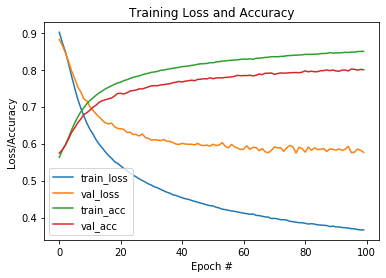

In [35]:
epoch_num = np.arange(0, 100)
plt.figure()
plt.plot(epoch_num, hist.history["loss"], label="train_loss")
plt.plot(epoch_num, hist.history["val_loss"], label="val_loss")
plt.plot(epoch_num, hist.history["acc"], label="train_acc")
plt.plot(epoch_num, hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('Breast Cancer CNN Epoch Plot')

Form the graph above, it can be seen that validation loss flattens after 80th eophc while training loss decreases. Hence, to prevent overfitting, the model is retrained to 80 epochs.

In [36]:
model=Sequential()

model.add(Conv1D(256, 1, input_shape=train_data.shape[1:], activation='relu'))
model.add(Conv1D(128, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(64, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(dummy_train_target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(train_data, dummy_train_target, epochs=80, batch_size=200, verbose=1, validation_data=(test_data,dummy_test_target))

Train on 298900 samples, validate on 74726 samples
Epoch 1/80
298900/298900 [==============================] - 32s 107us/step - loss: 0.9012 - acc: 0.5629 - val_loss: 0.8825 - val_acc: 0.5745
Epoch 2/80
298900/298900 [==============================] - 30s 99us/step - loss: 0.8718 - acc: 0.5827 - val_loss: 0.8651 - val_acc: 0.5847
Epoch 3/80
298900/298900 [==============================] - 32s 106us/step - loss: 0.8457 - acc: 0.5984 - val_loss: 0.8480 - val_acc: 0.5983
Epoch 4/80
298900/298900 [==============================] - 31s 105us/step - loss: 0.8137 - acc: 0.6176 - val_loss: 0.8209 - val_acc: 0.6114
Epoch 5/80
298900/298900 [==============================] - 31s 105us/step - loss: 0.7805 - acc: 0.6368 - val_loss: 0.7935 - val_acc: 0.6310
Epoch 6/80
298900/298900 [==============================] - 35s 117us/step - loss: 0.7484 - acc: 0.6553 - val_loss: 0.7756 - val_acc: 0.6434
Epoch 7/80
298900/298900 [==============================] - 31s 103us/step - loss: 0.7198 - acc: 0.6726 

Training Set and Test Performance.

In [37]:
y_hat_train_class = model.predict_classes(train_data, verbose=1)
y_hat_test_class = model.predict_classes(test_data, verbose=1)

print('\nTraining Set Performance\n')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(conf_matrix_ann)
cr_ann = classification_report(encoder.inverse_transform(encoded_train_target), encoder.inverse_transform(y_hat_train_class))
print(cr_ann)

print('\nTest Set Performance\n')
conf_matrix_ann = confusion_matrix(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(conf_matrix_ann)

cr_ann = classification_report(encoder.inverse_transform(encoded_test_target), encoder.inverse_transform(y_hat_test_class))
print(cr_ann)

74726/74726 [==============================] - 8s 107us/step

Training Set Performance

[[88039  2424  9056]
 [  627 96451  2678]
 [10062  8214 81349]]
              precision    recall  f1-score   support

     5-10yrs       0.89      0.88      0.89     99519
      <=5yrs       0.90      0.97      0.93     99756
      >10yrs       0.87      0.82      0.84     99625

    accuracy                           0.89    298900
   macro avg       0.89      0.89      0.89    298900
weighted avg       0.89      0.89      0.89    298900


Test Set Performance

[[20114  1323  3586]
 [  582 22807  1397]
 [ 4783  3433 16701]]
              precision    recall  f1-score   support

     5-10yrs       0.79      0.80      0.80     25023
      <=5yrs       0.83      0.92      0.87     24786
      >10yrs       0.77      0.67      0.72     24917

    accuracy                           0.80     74726
   macro avg       0.80      0.80      0.79     74726
weighted avg       0.80      0.80      0.79     74726
